<a href="https://colab.research.google.com/github/karthikeya-2005/Machine-Learning-lab/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Task 2: Load the Data and Libraries
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
# Reproducible random data (already saved as CSV for reference)
from pathlib import Path

rng = np.random.default_rng(7)

# Load the prepared CSV so students can also download it if needed
df = pd.read_csv('/content/DMV_Written_Tests.csv')
df.head()


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

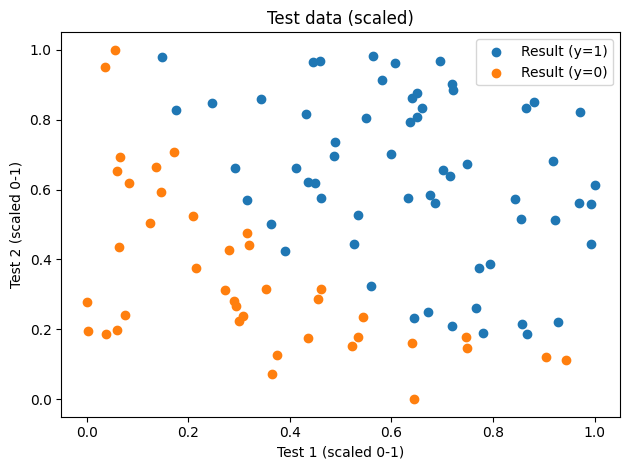

In [9]:
def minmax(a: np.ndarray):
    return (a - a.min()) / (a.max() - a.min())

test1 = minmax(df['DMV_Test_1'].values)
test2   = minmax(df['DMV_Test_2'].values)
y      = df['Results'].values.astype(float)

X = np.column_stack([test1, test2])  # shape (n, 2)

# Quick scatter
plt.figure()
plt.scatter(X[y==1,0], X[y==1,1], label='Result (y=1)')
plt.scatter(X[y==0,0], X[y==0,1], label='Result (y=0)')
plt.xlabel('Test 1 (scaled 0-1)')
plt.ylabel('Test 2 (scaled 0-1)')
plt.legend()
plt.title('Test data (scaled)')
plt.tight_layout()
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [14]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))




### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [17]:

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    # clip to avoid log(0)
    h = np.clip(h, 1e-10, 1 - 1e-10)
    cost = -(1/m) * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
    return cost.item()

# Gradient function
def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    grad = (1/m) * (X.T @ (h - y))
    return grad



### Task 6: Cost and Gradient at Initialization
---

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$